# Aprendizaje Automático

## Tarea 3

Profesor: MSc. Felipe Meza.

Instituto Tecnológico de Costa Rica, 

Medio de entrega: TecDigital.

Entregables: El entregable consiste en el url de la notebook Tarea-3.ipynb en GITHUB. 

Grupo de trabajo:
- Manuel Calderón
- Ernesto Rivera

---
Objetivo: El objetivo de la Tarea 3 consiste en elegir un conjunto de datos de mediana complejidad que no sea trivial, y aplicarle algunos algoritmos supervisados de su elección

# Métricas para evaluación de los modelos de aprendizaje supervisado

Dado a que es muy importante llevar a cabo una correcta evaluación de los modelos en los sistemas de aprendizaje automático, se deben realizar las correctas métricas de evaluación, de acuerdo al respectivo enfoque de cómo se aplique la tarea. 

Dentro del aprendizaje supervizado existen 2 enfoques que serían clasificación y regresión.

Para el caso de la explicación desglozaremos las distintas méticas de acuerso a si son de regresión o clasificación:

**NOTA:** para estos ejemplos y definiciones se utilizaron los siguientes enlaces

Regresión:
- https://sitiobigdata.com/2019/05/27/aprendizaje-automatico-seleccionando-metricas-regresion/#
- https://sitiobigdata.com/2019/05/27/modelos-de-machine-learning-metricas-de-regresion-mse-parte-2/

Clasificación:
- https://sitiobigdata.com/2019/01/19/machine-learning-metrica-clasificacion-parte-3/#

Ejemplos de código en general:
- https://scikit-learn.org/stable/modules/model_evaluation.html



## Métricas de regresión

**Error cuadrático medio (MSE)**

Es quizás la métrica sencilla y más usada para la evaluación de regresión. 

Se define por la ecuación:

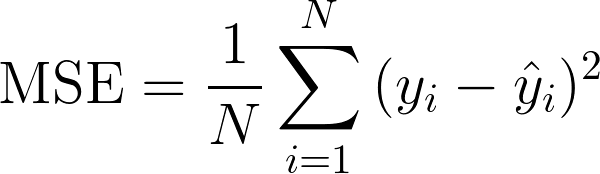

Con yᵢ es el resultado real esperado y ŷᵢ es la predicción del modelo.

Esta métrica mide el error cuadrado promedio de nuestras predicciones. Para cada punto, calcula la diferencia cuadrada entre las predicciones y el objetivo y luego promedia esos valores.

Cuanto mayor sea este valor, peor es el modelo.  Además, la sumatoria al ser cuadrada nunca será negatica.

Ventaja: su utilidad para medir valores inesperados, ya que si el valor es muy alto o muy bajo se debe prestar la atención debida.

Desventaja: si la prediccion es muy mala, al ser cuadrado esta será aun peor ya que se podría sobreestimar lo malo del modelo (esto se ve más aún en datos no confiables). También puede pasar el caso contrario donde los errores son my pequeños y se sobreestima lo bueno del modelo.

Ejemplo de sklearn:

In [1]:
from sklearn.metrics import mean_squared_error

y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]

mean_squared_error(y_true, y_pred)

0.7083333333333334

**Error cuadrático medio (RMSE)**

RMSE es aplica una raíz cuadrada al MSE, esto permite que la escala de los errores sea igual a la escala de los objetivos.

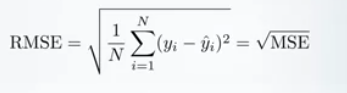

La diferencia principal es en el uso de modelos basados en gradiente, ya que se usa una tasa de flujo diferente, aunque esta dependa de la puntuación del MSE. Y, por lo tanto, no pueden ser intercmabiables en estos métodos, ya que requeriría un ajuste en los parametros de aprendizaje,

Ejemplo:

In [2]:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]

mean_squared_error(y_true, y_pred, squared=False)

0.8227486121839513


**Error absoluto medio (MAE)**

El cálculo se aplica como un promedio de diferencias absolutas entre los valores objetivo y las predicciones, esta utiliza una puntuación lineal (todas las diferencias individuales se ponderan por igual en el promedio).

Se calcula utilizando esta fórmula:

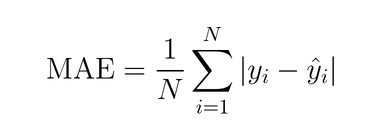

Esta métrica penaliza lo errores enormes y por lo tanto no es tan sensible a errores atípicos como MSE.  Así, da una ventaja si existen outliers en la data.

Ejemplo:

In [3]:
from sklearn.metrics import mean_absolute_error

y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]

mean_absolute_error(y_true, y_pred)

0.75

**R al cuadrado (R²)**

Representa la proporción de varianza de _y_ que ha sido explicada por las variables independientes en el modelo, está estrechamente relacionada con la MSE, pero tiene la ventaja de estar libre de escala, por lo tanto, el R² siempre estará en el rango ]-∞, 1].

Cuando R² es negativo, significa que el modelo es peor que predecir la media.

Se aplica con la siguiente fórmula:

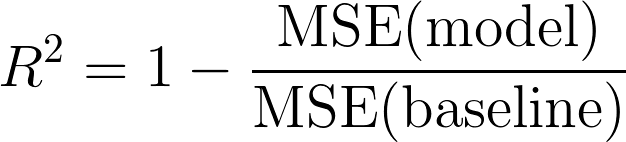

Donde MSE(model) es la fórmula normal que vimos antes. Baseline la siguiente:

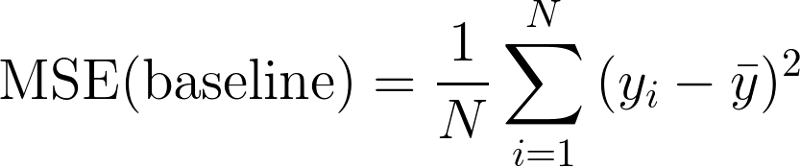

Con la ȳ es la media de la _y_ observada.

Ejemplo:

In [4]:
from sklearn.metrics import r2_score

y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]


# ‘variance_weighted’: Scores of all outputs are averaged, weighted by the variances of each individual output.
r2_score(y_true, y_pred, multioutput='variance_weighted')

0.9382566585956417

**R cuadrado ajustado (R²)**

El R2 ajustado indica qué tan bien se ajustan los términos a una curva o línea, pero aplicando un ajuste al número de términos del modelo. Este indica el porcentaje de variación explicado solo por las variables independientes que realmente afectan la variable dependiente.

Se calcula de la siguiente manera:

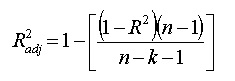

Con _n_ el número total de observaciones y _k_ el número de regresores independientes.

Ejemplo:

In [5]:
from sklearn.metrics import r2_score

y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]


# ‘variance_weighted’: Scores of all outputs are averaged, weighted by the variances of each individual output.
r2_score(y_true, y_pred, multioutput='variance_weighted')

# print(1-(1-r2_score(y_true, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)))

0.9382566585956417

**Error porcentual absoluto medio (MAPE)**

Para cada objeto, el error absoluto se divide por el valor objetivo, dando un error relativo. Es cosiderado como versiones poderadas del MAE.

![image.png](attachment:image.png)

En esta métrica el peso de la muestra es inversamente proporcional a su objetivo y las predicciones constantes óptimas resultan ser la mediana ponderada de los valores objetivo.

Un problema de esta métrica es que si existieran valores atípicos muy pequeños, el método se ve sesagado hacia esos valores por el peso que se le dan.

Ejemplo:

In [6]:
from sklearn.metrics import mean_absolute_percentage_error

y_true = [1, 10, 1e6]
y_pred = [0.9, 15, 1.2e6]

mean_absolute_percentage_error(y_true, y_pred)

0.26666666666666666

**Error logarítmico cuadrático medio (RMSLE)**

Esta métrica aplica un RMSE pero calculado en escala logarítmica, para ello se toma un logaritmo de las predicciones y los valores objetivos. 

Por lo general los objetivos no son negativos pero pueden ser 0, dando que logaritmo sea indefinido, por que se deben agrear constantes a las predicciones y objetivos para evitar dicho error (Esta constante varia dependiendo del problema).

Como ventaja del RMSLE es que penaliza las estimaciones poco predichas aún más que las estimaciones sobre pronosticadas.

La fórmula aplicada es la siguiente:

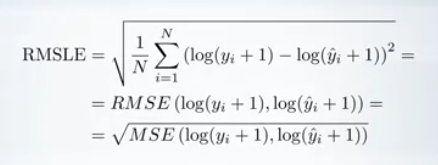


Ejemplo:

In [7]:
from sklearn.metrics import mean_squared_log_error

y_true = [3, 5, 2.5, 7]
y_pred = [2.5, 5, 4, 8]

mean_squared_log_error(y_true, y_pred)

0.03973012298459379

## Métricas de clasificación


**Matriz de confusión o error**

Esta es una tabla que describe el rendimiento de un modelo supervisado en los datos de prueba, donde se desconocen los verdaderos valores. Este hace que sea fácil detectar dónde el sistema está confundiendo dos clases.

Donde se aplican estas reglas:

True Positives (TP): cuando la clase real del punto de datos era 1 (Verdadero) y la predicha es también 1 (Verdadero)

Verdaderos Negativos (TN): cuando la clase real del punto de datos fue 0 (Falso) y el pronosticado también es 0 (Falso).

False Positives (FP): cuando la clase real del punto de datos era 0 (False) y el pronosticado es 1 (True).

False Negatives (FN): Cuando la clase real del punto de datos era 1 (Verdadero) y el valor predicho es 0 (Falso).

Muchos de las métricas de clasificación usan como base la matriz de confusión y el manejo de estas reglas.

Ejemplo:

In [8]:
from sklearn.metrics import confusion_matrix

y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

**Accuracy**

Es el porcentaje total de elementos clasificados correctamente. Su valor valor va entre 0 y 1 (entre más alto mejor).

Se maneja de la siguiente forma:

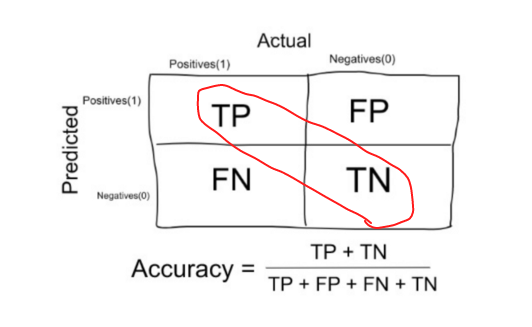
 
Tiene la desventaja, de que se generan problemas si las clases de variables no están balanceadas.
Por el contrario, su ventaja es que es una buena medida a usar cuando las clases están casi equilibradas.



In [9]:
import numpy as np
from sklearn.metrics import accuracy_score

y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]

accuracy_score(y_true, y_pred)

0.5

**Recall o sensibilidad o TPR (Tasa positiva real)**

Es el número de elementos identificados correctamente como positivos del total de positivos verdaderos. El recall nos da información sobre el rendimiento de un clasificador con respecto a falsos negativos (cuántos fallaron).

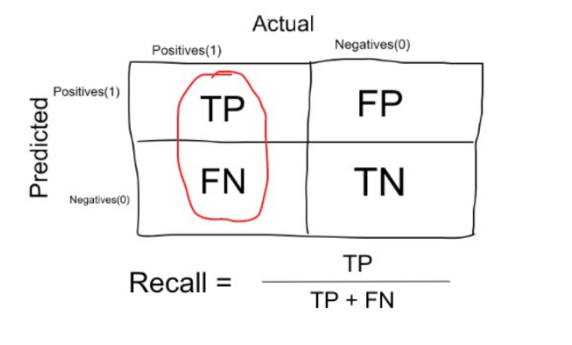

Ejemplo:


In [10]:
from sklearn.metrics import recall_score

y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]

# Calculate metrics globally by counting the total true positives, false negatives and false positives.
recall_score(y_true, y_pred, average='micro')

0.3333333333333333

**Precisión**

Es el número de elementos identificados correctamente como positivo entre total de elementos identificados como positivos (sean o no positivos realmente).

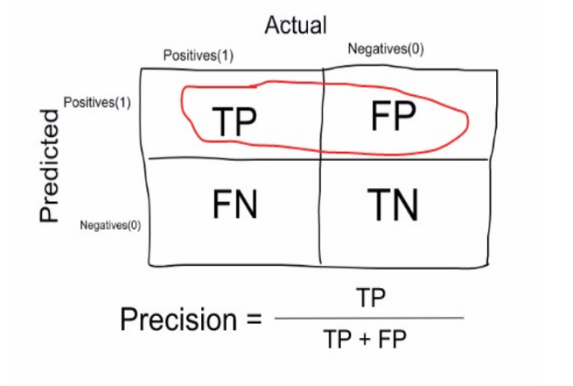


La precisión nos proporciona información sobre su rendimiento con respecto a los falsos positivos (cuántos capturados). Si queremos enfocarnos en minimizar los falsos positivos, entonces esta métrica es la ideal cuando se busca estar lo más cerca del 100%.

Ejemplo:

In [11]:
from sklearn.metrics import precision_score

y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]

# Calculate metrics globally by counting the total true positives, false negatives and false positives.
precision_score(y_true, y_pred, average='micro')

0.3333333333333333

**Especificidad o TNR (Tasa negativa real)**

Es el número de ítems correctamente identificados como negativos entre total de elementos negativos (la especificidad es exactamente lo opuesto a Recall).

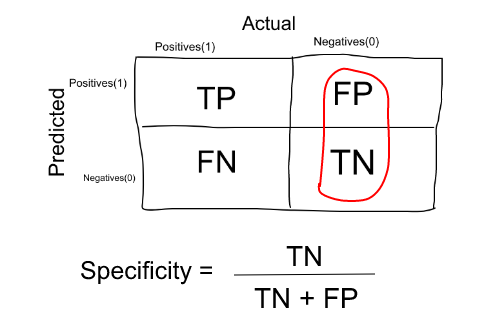

Ejemplo:


In [12]:
from sklearn.metrics import confusion_matrix

y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

specificity = tn / (tn+fp)

print(specificity)

0.6666666666666666


**F1-Score**

Por un lado, la precisión es un ejemplo de una métrica de evaluación de un solo número y le permite comparar rápidamente dos clasificadores. Mientras que el recall da 2 números para evaluar su clasificador.

Es mejor si podemos obtener una sola puntuación que representa tanto Precisión (P) como recall (R).  Una forma de hacerlo es con un promedio ponderado entre la precisión y el Recall, donde 1 es el mejor valor y el 0 el peor. 

Se aplica la siguiente fórmula:
$$
F1 = 2 * \frac{precision * recall}{precision + recall}
$$

In [13]:
from sklearn.metrics import f1_score

y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]

f1_score(y_true, y_pred, average='micro')

0.3333333333333333



**Área bajo la curva de funcionamiento del receptor (ROC) (AUC)**

Entre las métricas de clasificación se tiene la curva AUC-ROC, donde ROC viene de las características de funcionamiento del receptor y AUC del área bajo la curva.

La curva ROC nos dice qué tan bueno puede distinguir el modelo entre dos cosas, por ejemplo, si un paciente tiene cáncer o no. 

El AUC es el área bajo la curva ROC. Este puntaje nos da una buena idea de qué tan bien funciona el modelo.

Tomado de https://aprendeia.com/curvas-roc-y-area-bajo-la-curva-auc-machine-learning/

Ejemplo:


In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

X, y = load_breast_cancer(return_X_y=True)
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)

roc_auc_score(y, clf.decision_function(X))

0.9947016542466043

**Pérdida logarítmica**

Obtiene la reducción de la pérdida. Mide cuánto mejora un modelo dado un modelo que dé predicciones aleatorias.  La reducción de la pérdida más cercana a 1 indica un mejor modelo.

Tomado de https://docs.microsoft.com/es-es/dotnet/api/microsoft.ml.data.multiclassclassificationmetrics.loglossreduction?view=ml-dotnet#Microsoft_ML_Data_MulticlassClassificationMetrics_LogLossReduction

Ejemplo:

In [15]:
from sklearn.metrics import log_loss

log_loss(["spam", "ham", "ham", "spam"],
         [[.1, .9], [.9, .1], [.8, .2], [.35, .65]])

0.21616187468057912


**Cohen’s Kappa**

Esta métrica se usa a menudo para evaluar el acuerdo entre dos evaluadores, también se puede utilizar para evaluar el rendimiento de los modelos. 

Una ventaja esta toma en cuenta el desequilibrio en la distribución de clases y, por lo tanto, puede ser más complejo de interpretar.

Tomado de https://www.knime.com/blog/cohens-kappa-an-overview

Ejemplo:

In [16]:
from sklearn.metrics import cohen_kappa_score

y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

cohen_kappa_score(y_true, y_pred)

0.4285714285714286

# Manejo y preprocesado de datos


Para el ejemplo de los algoritmos supervisados se escogió el dataset de Agora.csv, utilizado en la tarea 2, ya que proporciona bastantes datos a trabajar.


In [17]:
import numpy as np
import pandas as pd
import torch as torch
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
## función para graficar
def graficar(X, Y1, Y2, xlabel, ylabel):
    
    if Y2:
        _, (ax1, ax2) = plt.subplots(1, 2, sharey=False)

        ax1.plot(X, Y1)
        ax1.set_xlabel(xlabel)
        ax1.set_ylabel(ylabel)
        ax2.set_xlabel(xlabel)
        ax2.plot(X, Y2)
    else:
        plt.plot(X, Y1)
        plt.xlabel(xlabel)        
        plt.ylabel(ylabel)

    plt.suptitle("Error datos de entrenamiento y datos de prueba")
    plt.tight_layout(pad=3.0)

    plt.show()

In [19]:
## reemplazos textuales para curar los datos del dataset
replacements = [
["\"This Listing Is For Verified", "This Listing Is For Verified", -1],
["\"This subtropical", "This subtropical", -1],
["\"This po", "This po", -1],
["\"Mr. H", "Mr. H", -1],
["\"An engaging", "An engaging", -1],
[",\"Professional F", ",Professional F", -1],
[",\"Professional D", ",Professional D", -1],
["SKU:90183\"", "SKU:90183", -1],
["\"Encryption", "Encryption", -1],
["\"ProSoma", "ProSoma", -1],
["\"If you’", "If you’", -1],
[",\"Named", "Named", -1],
[",\"THC", ",THC", -1],
["\"Strassman'", "Strassman'", -1],
["\"You d", "You d", -1],
[",\"This is your", ",This is your", -1],
["35,\"P", "35,P", -1],
["wing,\"", "wing,", -1],
["22,\"I", "22,I", -1],
[",\"G13", ",G13", -1],
["0,\"Pl", "0,Pl", -1],
["s Sunglasses Replica are 1:1  ...", "s Sunglasses Replica are 1:1 ...\"", -1],
["],,,,", "],", -1],
[",David Icke (", ",\"David Icke (", -1],
["r Bud,I", "r Bud,\"I", -1],
["hone,B", "hone,\"B", -1],
["h,I r", "h,\"I r", -1],
[".,0.01547", ".\",0.01547", -1],
["~5/5,,", "~5/5,", -1],
[".,2.32555", ".\",2.32555", -1],
["/5,,", "/5,", -1],
[".,0.130088", ".\",0.130088", -1],
["tazepam,", "tazepam\",", -1],
["E,15.8", "E\",15.8", -1],
["Quality\"\" we've all come to know and love. This MD ...\",1", 
                        "Quality we've all come to know and love. This MD ...,1", -1] ]

with open("Agora2.csv", "wb") as nuevoArchivo: # trunca el archivo si ya existe
    with open("Agora.csv", mode="r", encoding="UTF-8", errors="ignore") as archivoOriginal:
        numero = 1
        for linea in archivoOriginal:
            if numero == 5000:
                break
            try:
                # se corrigen los errores encontrados
                for rep in replacements:
                    modified = False
                    if rep[0] in linea:
                        if not modified:
                            rep[2] = numero
                            modified = True
                        linea = linea.replace(rep[0], rep[1])
                
                # se almacena el texto en el nuevo archivo
                linea = linea.encode("utf-8")
                nuevoArchivo.write(linea)
            except Exception as e:
                print("Error con el string", numero, linea, e)
                raise e
            finally:
                numero += 1

# replacements

In [20]:
df = pd.read_csv("Agora2.csv")
df.describe()

,Vendor,Category,Item,Item Description,Price,Origin,Destination,Rating,Remarks
count,4998,4998,4998,4998,4998,3521,1525,4998,721
unique,339,21,4953,3930,4870,61,84,74,1
top,fake,Drugs/Prescription,Social Engineering: The Art of Human Hacking,This shipment is with tracking number. The shi...,0.00415549 BTC,USA,Worldwide,5.00/5,Average price may be skewed outliar > .5 BTC f...
freq,467,1057,3,96,29,691,492,839,721


In [21]:

print('Cantidad de filas iniciales:', df.shape[0])

# queda en 10737 si outliers
df = df[df[" Remarks"] != "Average price may be skewed outliar > .5 BTC found"]
print('Cantidad de filas sin outliars:', df.shape[0])

# Elimina entradas sin rating
df.dropna(subset = [" Rating"], inplace=True)
print('Cantidad de filas con rating no nulo:', df.shape[0])

# se deja los Ratings válidos - que terminan en '/5'
df = df[df[" Rating"].str.endswith("/5")]
print('Cantidad de filas con ratings válidos:', df.shape[0])

# Todas las entradas tienen precio, entonces **no elimina** ninguna fila
df.dropna(subset = [" Price"], inplace=True)
print('Cantidad de filas con precio:', df.shape[0])

# Verifica la cantidad de entradas que terminan con 'BTC'
print('cantidad de precios en BTC:', df[" Price"].str.endswith('BTC').count() )

# texto a números
df[" Price"]  = df[" Price"].str.replace(" BTC" , "")
df[" Rating"] = df[" Rating"].str.replace("/5" , "")
df[" Rating"] = df[" Rating"].str.replace("~" , "")
df[" Price"]  = pd.to_numeric(df[" Price"], errors ="coerce")
df[" Rating"] = pd.to_numeric(df[" Rating"], errors ="coerce")



# eliminar features no necesarios
df.drop(columns=[" Item", " Item Description", " Origin", " Destination", " Remarks"], inplace=True)
print('Columnas restantes:', df.columns)

df.describe()

Cantidad de filas iniciales: 4998
Cantidad de filas sin outliars: 4277
Cantidad de filas con rating no nulo: 4277
Cantidad de filas con ratings válidos: 4088
Cantidad de filas con precio: 4088
cantidad de precios en BTC: 4088
Columnas restantes: Index(['Vendor', ' Category', ' Price', ' Rating'], dtype='object')


,Price,Rating
count,4.088000e+03,4088.000000
mean,6.705033e+00,4.866215
std,3.511620e+02,0.337424
min,1.000000e-07,0.000000
25%,2.818479e-02,4.827750
50%,1.000080e-01,4.960000
75%,2.541704e-01,4.994000
max,2.198500e+04,5.000000


In [22]:
def soloCategoria(cat):
    posInicio = cat.find("/")
    if posInicio == -1:
        return cat
    
    posFin = cat.rindex("/")
    if posInicio == posFin:
        return cat[posInicio+1:]
    return cat[posInicio+1:posFin]

# usa la subcategoría
df[" Category"] = df[ " Category" ].apply(soloCategoria)

# codifica la categoría usando one-hot-encoding
oneHotEncoded = pd.get_dummies(df, columns=[" Category"], prefix="Cat")


## Retorna la categoría correspondiente al rating.
## El valor Rating de los datos está en el rango [2.6, 5.0]
## Categorías resultantes:
## - 2: bueno
## - 1: regular
## - 0: malo
def categoriasDeRating(valor):
    if valor > 4.1:
        return 2 # bueno
    if valor > 3.2:
        return 1 # regular
    return 0 #malo

df[" RatingClass"] = df[ " Rating" ].apply(categoriasDeRating)

In [23]:
print(df[" Rating"])
oneHotEncoded.drop(columns=["Vendor", " Rating"], inplace=True)
print("Datos codificados usando one-hot-encoding", oneHotEncoded.shape[0])
print("Total columnas: ", oneHotEncoded.shape[1], oneHotEncoded.columns)

0       4.96
1       4.96
2       4.93
3       4.89
4       4.88
        ... 
4993    4.96
4994    4.67
4995    4.96
4996    4.96
4997    4.96
Name:  Rating, Length: 4088, dtype: float64
Datos codificados usando one-hot-encoding 4088
Total columnas:  20 Index([' Price', 'Cat_Accounts', 'Cat_Clothing', 'Cat_Electronics',
       'Cat_Guides', 'Cat_Hacking', 'Cat_Jewelry', 'Cat_Money', 'Cat_Other',
       'Cat_Physical documents', 'Cat_Pipes', 'Cat_Pirated',
       'Cat_Prescription', 'Cat_RCs', 'Cat_Scans', 'Cat_Smoked',
       'Cat_Software', 'Cat_Steroids', 'Cat_Weight loss', 'Cat_eBooks'],
      dtype='object')




# Métodos escogidos 

Para los algoritmos escogidos se usarán:

- Regresión lineal: es una aproximación para modelar la relación entre una variable escalar dependiente “y” y una o mas variables explicativas nombradas con “X”. Tomado de https://www.aprendemachinelearning.com/tag/regresion-lineal/
- Árboles de decisión:  es una estructura de árbol similar a un diagrama de flujo donde un nodo interno representa una característica (o atributo), la rama representa una regla de decisión y cada nodo hoja representa el resultado. Tomado de https://sitiobigdata.com/2019/12/14/arbol-de-decision-en-machine-learning-parte-1/.
- Random forest: consiste en un grupo de árboles de desición, entrenados por medio de bagging o bootstrap (otros ensambles), mejorando así la presicion, al final se toma el promedio o media de varios de los resultados. Tomado de https://www.section.io/engineering-education/introduction-to-random-forest-in-machine-learning/.


A continuación se agregan ejempĺos de cada algoritmo escogido con el dataset trabajado anteriormente:

**Regresión Lineal**

In [24]:
## datos para usar regresión
X_train, X_test, Y_train, Y_test = train_test_split(oneHotEncoded, df[" Rating"], random_state=13)
print("Cantidad de valores para entrenar:", Y_train.shape[0])
print("Cantidad de valores para comprobar:", Y_test.shape[0])

Cantidad de valores para entrenar: 3066
Cantidad de valores para comprobar: 1022


Error en set de pruebas: [5.051310058434176, 8.419887620553931, 5.707364081420399, 18.692777393375856, 25.552728141035622]


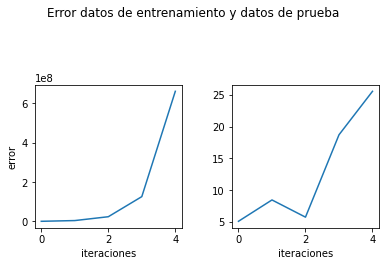

In [25]:
# regresión lineal usando pytorch

## modelo lineal
def modeloLineal(x, w, b):
    return x @ w + b

## función de cálculo de error, usando mse
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()


## Calcula un epoch más para la regresión lineal
def regresionLinealForward(metrica, inputs, targets, w, b):
    preds = modeloLineal(inputs, w, b)
    loss = metrica(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()
        error = loss.numpy()
    return error

## Va entrenando la regresión lineal y calculando la tasa de error
## de los datos para pruebas
def regresionLineal(metrica, w, b, X, Y, X_test, Y_test):
    iteraciones = range(5)
    erroresEntrenamiento = []
    erroresPruebas = []
    for i in iteraciones:
        # un paso de entrenamiento
        errorEntrenamiento = regresionLinealForward(mse, X, Y, w, b)
        erroresEntrenamiento.append(errorEntrenamiento)
        
        # test con el modelo resultante
        predicciones = modeloLineal(X_test, w, b)
        with torch.no_grad():
            errorTest = metrica(Y_test, predicciones)
            erroresPruebas.append(errorTest)
        
    #print(erroresEntrenamiento)
    print("Error en set de pruebas:", erroresPruebas)
    graficar(iteraciones, erroresEntrenamiento, erroresPruebas, "iteraciones", "error")
    return erroresPruebas

# Prepara los datos de entrada y los w, b iniciales
def testRegresionLineal(metrica):
    # convierte a tensor de pytorch
    inputs = torch.tensor(X_train.values)
    target = torch.tensor(Y_train.values)
    
    inputs_test = torch.tensor(X_test.values)
    target_test = torch.tensor(Y_test.values)
    
    # valores iniciales, aleatorios
    torch.manual_seed(0)
    w = torch.randn(inputs.shape[1], 1, dtype=torch.float64, requires_grad=True)
    b = torch.randn(1, dtype=torch.float64, requires_grad=True)
    
    return regresionLineal(metrica, w, b, inputs, target, inputs_test, target_test)
    
errorUsandoMSE = testRegresionLineal(mean_absolute_error)

**Árboles de decisión**

In [26]:
## datos para usar clasificación
X_class_train, X_class_test, Y_class_train, Y_class_test = train_test_split(oneHotEncoded, df[" RatingClass"], random_state=13)

[0.987279843444227, 0.987279843444227, 0.9863013698630136, 0.9853228962818004]


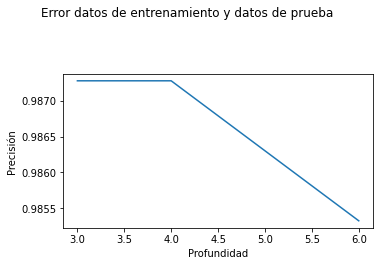

In [27]:
## Función auxiliar
def ajustarYEvaluarModelo(modelo):
    modelo.fit(X_class_train, Y_class_train)
    y_predict = modelo.predict(X_class_test)
    acc = accuracy_score(Y_class_test, y_predict)
    return acc

## Utilizando árboles de decisión

def testDecisionTree():
    profundidades = range(3, 7)
    precision = []
    for i in profundidades:
        modelo = DecisionTreeClassifier(max_depth = i)
        precision.append(ajustarYEvaluarModelo(modelo))

    print(precision)
    graficar(profundidades, precision, None, "Profundidad", "Precisión")

testDecisionTree()

**Random forest**

[0.987279843444227, 0.987279843444227, 0.987279843444227, 0.987279843444227]


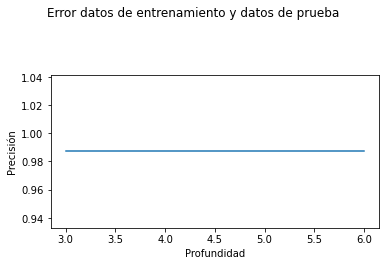

In [28]:
## Utilizando random forest
def testRandomForest():
    profundidades = range(3, 7)
    precision = []
    for i in profundidades:
        modelo = RandomForestClassifier(min_samples_leaf=4, max_depth=i)
        precision.append(ajustarYEvaluarModelo(modelo))

    print(precision)
    graficar(profundidades, precision, None, "Profundidad", "Precisión")

testRandomForest()

# Métodos de ensamble

El objetivo de los métodos de emsamble es combinar las predicciones de varios estimadores con un algoritmo de aprendizaje así hacer una prediccion general más robusta. 

Por lo general, se distinguen dos familias de métodos de ensamble:

- En los métodos de promediado: Estos métodos aplican varias predicciones o estimaciones independientes y luego las promedia, esto por lo general da un mejor resultado que cualquiera de las estimaciones independientes. Ejemplos: Bagging methods, Forests of randomized trees.
    

- En los métodos de Boost (Boosting methods): los estimadores se construyen secuencialmente y se intenta reducir el sesgo del estimador combinado. La motivación es combinar varios modelos débiles para producir un conjunto poderoso. Ejemplos: AdaBoost, Gradient Tree Boosting,…
    

Tomado de https://scikit-learn.org/stable/modules/ensemble.html

Para nuestro caso se escogió explicar el algoritmo de ensamble de Bagging.
    
Estos métodos toman un grupo de instancias en un estimador estilo caja negra donde se manejan conjustos aleatorios del conjuto de entrenamiento, luego se agregan las predicciones individuales para formar una predicción final.

Tomado de https://scikit-learn.org/stable/modules/ensemble.html

[0.987279843444227, 0.987279843444227, 0.987279843444227, 0.987279843444227]


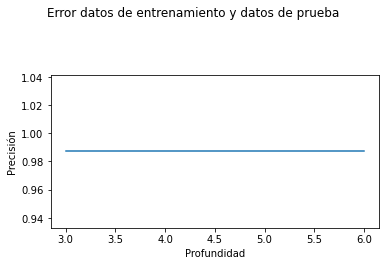

In [29]:
## Utilizando Bagging
def testBagging():
    profundidades = range(3, 7)
    precision = []
    for i in profundidades:
        modelo = BaggingClassifier(base_estimator=KNeighborsClassifier(), max_samples=(0.1*i), max_features=(0.1*i))
        precision.append(ajustarYEvaluarModelo(modelo))

    print(precision)
    graficar(profundidades, precision, None, "Profundidad", "Precisión")

testBagging()

# Análisis  General

Como se mencionó anteriormente se manejaron 3 algoritmos vistos en clase y 1 ejemplo de ensamble nuevo.  Los resultados se detallan a continuación:

**Regresión Lineal**

Para la regresión se aplicó la métrica de MSE, pero esta arrojó datos muy malos, la aplicación de algoritmos de regresión en este tipo de dataset no parece ser una buena estrategia por lo que para las siguientes comprobaciones se pasó a usar algoritmos de clasificación. 


**Árboles de decisión**

Para el árbol de decisión se observaron muy buenos resultados estando todos en un aproximado de 98,7%. También se notó que después de usar una profundidad de 4 la precisión fue empeorando, pero siempre con un nivel superior a 98%.

**Random forest**

Para el random forest se nota un resultado sumamente curioso dado que sin importar las corridas nos da como un óptimo promediado igual de bueno llegando a 0.9872. Esto no cambio sin importar el rango de profundidad suministrado.


**Bagging**

Este es un método de ensamble.
Al igual que el random forest, el bagging arrojó valores muy buenos (los mismos resultados que se aprecian en el random forest, específicamente).

**NOTA:** Para una compración equitativa de resultados se uso una métrica de accuracy para los 3 algoritmos de clasificación. 
